In [28]:
import pandas as pd

today = '12pm' # Just the day number of today's date AS A STRING

results_df = pd.read_excel('H:\9-15 Reports 2024\IncludingEFileAwaiting_09-' + today + '.xlsm',sheet_name='Search')
# results_df.head()

The following cell was a test of the code before I ran it in a for loop.

In [2]:
# rp1 = 'Livingston, Nancy A.'
# count1 = results_df[results_df['Responsible Party'] == rp1][results_df['Current Status'] != 'eFile-Awaiting Taxpayer Consent Form']['Client/Entity Name'].count()
# counte1 = results_df[results_df['Responsible Party'] == rp1][results_df['Current Status'] == 'eFile-Awaiting Taxpayer Consent Form']['Client/Entity Name'].count()

# print(f'{count1}, {counte1}')

In [29]:
import warnings
warnings.filterwarnings('ignore')

rp_list = results_df['Responsible Party'].unique()
count_list = []
ecount_list = []

for rp in rp_list:
    count = results_df[results_df['Responsible Party'] == rp][results_df['Current Status'] != 'eFile-Awaiting Taxpayer Consent Form']['Client/Entity Name'].count()
    ecount = results_df[results_df['Responsible Party'] == rp][results_df['Current Status'] == 'eFile-Awaiting Taxpayer Consent Form']['Client/Entity Name'].count()
    count_list.append(count)
    ecount_list.append(ecount)
    

In [30]:
graph_df = pd.DataFrame()
graph_df['Responsible Party'] = rp_list
graph_df['Remaining, not "e-File Awaiting..."'] = count_list
graph_df['Remaining, "e-File Awaiting..."'] = ecount_list
graph_df = graph_df.sort_values('Remaining, not "e-File Awaiting..."')
# graph_df.head()


<Axes: title={'center': '9/15 Returns Remaining as of 11:20a 12pm September'}, ylabel='Responsible Party'>

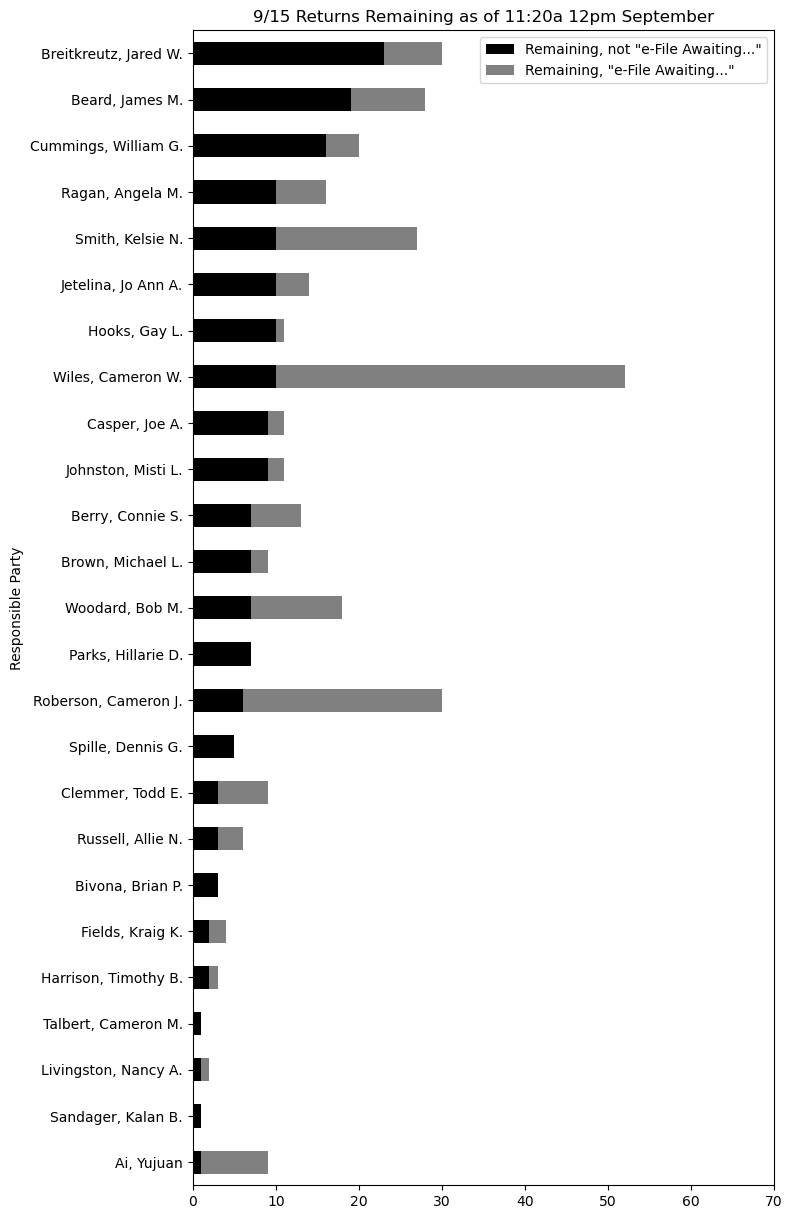

In [31]:
# report_df.iloc[22,1] += 72 # Activate this line if you want to scare John

graph_df.plot.barh(stacked=True,
                   x='Responsible Party',
                   y=['Remaining, not "e-File Awaiting..."','Remaining, "e-File Awaiting..."'],
                   figsize=(7.5,15),
                   title='9/15 Returns Remaining as of 11:20a ' + today + ' September',
                   color=['black','gray'],
                   xlim=(0,70))

# So dataframe.plot.barh has some screwed up kwargs. For a barh plot, x= is going to give you the vertical axis. This almost makes
# sense because it's the independent variable. But then, xlim= controls the limits of the horizontal axis. I bet this has to do
# with which kwargs are brought in from other functions. Still, super confusing.


Let's see if we can do that report with pandas instead of a pivot table. If I could get this in a functioning script, I could make this report in just a few clicks.

In [23]:
report_df = pd.DataFrame(pd.pivot_table(
    results_df,
    values='Client/Entity Name',
    index='Responsible Party',
    columns='Current Status',
    aggfunc='count'
))
report_df = report_df.fillna('0')
report_df = report_df.astype(int)
report_df

Current Status,Awaiting CAS,Awaiting Info,Awaiting Pickup,Cleared 1st Review Points,Final Review,No Info In,Not Yet Started,Open 1st Review Points,Open Final Review Points,Preparation,Questions Posted,Review,Reviewed Awaiting K1,To Be Delivered,eFile-Awaiting Taxpayer Consent Form
Responsible Party,,,,,,,,,,,,,,,
"Ai, Yujuan",0,0,0,0,0,0,0,0,0,1,0,1,0,0,12
"Beard, James M.",0,6,1,0,4,0,0,0,0,5,1,3,0,0,14
"Berry, Connie S.",0,3,0,1,0,1,0,1,0,0,0,0,0,1,6
"Bivona, Brian P.",0,0,0,0,0,3,0,0,0,0,0,0,0,0,0
"Breitkreutz, Jared W.",0,4,0,1,1,3,0,4,2,4,0,5,0,0,6
"Brown, Michael L.",0,1,1,0,0,4,0,1,0,0,0,2,0,0,2
"Casper, Joe A.",0,6,0,0,1,1,0,0,1,0,0,2,0,0,1
"Clemmer, Todd E.",0,0,0,0,0,4,0,0,0,0,0,1,0,0,4
"Cummings, William G.",0,2,0,0,1,0,0,1,1,7,0,3,0,0,6


In [24]:
report_df['Total'] = report_df.sum(axis=1)
report_df['Total w/o "eFile-Awaiting"'] = report_df['Total'] - report_df['eFile-Awaiting Taxpayer Consent Form']
# report_df.replace(0,'',inplace=True)
report_df

Current Status,Awaiting CAS,Awaiting Info,Awaiting Pickup,Cleared 1st Review Points,Final Review,No Info In,Not Yet Started,Open 1st Review Points,Open Final Review Points,Preparation,Questions Posted,Review,Reviewed Awaiting K1,To Be Delivered,eFile-Awaiting Taxpayer Consent Form,Total,"Total w/o ""eFile-Awaiting"""
Responsible Party,,,,,,,,,,,,,,,,,
"Ai, Yujuan",0,0,0,0,0,0,0,0,0,1,0,1,0,0,12,14,2
"Beard, James M.",0,6,1,0,4,0,0,0,0,5,1,3,0,0,14,34,20
"Berry, Connie S.",0,3,0,1,0,1,0,1,0,0,0,0,0,1,6,13,7
"Bivona, Brian P.",0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,3,3
"Breitkreutz, Jared W.",0,4,0,1,1,3,0,4,2,4,0,5,0,0,6,30,24
"Brown, Michael L.",0,1,1,0,0,4,0,1,0,0,0,2,0,0,2,11,9
"Casper, Joe A.",0,6,0,0,1,1,0,0,1,0,0,2,0,0,1,12,11
"Clemmer, Todd E.",0,0,0,0,0,4,0,0,0,0,0,1,0,0,4,9,5
"Cummings, William G.",0,2,0,0,1,0,0,1,1,7,0,3,0,0,6,21,15


In [25]:
report_df.loc['TOTALS'] = report_df.sum()
publish_df = report_df.replace(0,'')
publish_df

Current Status,Awaiting CAS,Awaiting Info,Awaiting Pickup,Cleared 1st Review Points,Final Review,No Info In,Not Yet Started,Open 1st Review Points,Open Final Review Points,Preparation,Questions Posted,Review,Reviewed Awaiting K1,To Be Delivered,eFile-Awaiting Taxpayer Consent Form,Total,"Total w/o ""eFile-Awaiting"""
Responsible Party,,,,,,,,,,,,,,,,,
"Ai, Yujuan",,,,,,,,,,1,,1,,,12,14,2
"Beard, James M.",,6,1,,4,,,,,5,1,3,,,14,34,20
"Berry, Connie S.",,3,,1,,1,,1,,,,,,1,6,13,7
"Bivona, Brian P.",,,,,,3,,,,,,,,,,3,3
"Breitkreutz, Jared W.",,4,,1,1,3,,4,2,4,,5,,,6,30,24
"Brown, Michael L.",,1,1,,,4,,1,,,,2,,,2,11,9
"Casper, Joe A.",,6,,,1,1,,,1,,,2,,,1,12,11
"Clemmer, Todd E.",,,,,,4,,,,,,1,,,4,9,5
"Cummings, William G.",,2,,,1,,,1,1,7,,3,,,6,21,15
